<a href="https://colab.research.google.com/github/spectro81/Python-fantasy-football/blob/main/Football_and_Python_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
players = [
{
"name": "Michael Thomas",
"catches": 149,
"targets": 185
},
{
"name": "Julio Jones",
"catches": 99,
"targets": 157
},
{
"name": "Davante Adams",
"catches": 83,
"targets": 127
}
]

for player in players:
  name = player['name']
  catches = player['catches']
  targets = player['targets']
  catch_rate = catches/targets
  print(name + ' had a catch rate of ' + str(catch_rate))

Michael Thomas had a catch rate of 0.8054054054054054
Julio Jones had a catch rate of 0.6305732484076433
Davante Adams had a catch rate of 0.6535433070866141


In [3]:
my_list_one = [1,2,3,4]
my_list_two = ['a', 'b', 'c', 'd']
my_list_three = [[1,2,3], [4,5,6]]
my_list_four = [my_list_one, my_list_two, my_list_three]
my_list_five = [1, 'a', my_list_four, { 'key': 'value'}]

In [7]:
players = [{
 'name': 'Aaron Jones',
 'rushing_yds': 1084,
 'rushing_att': 236
}, {
 'name': 'Derrick Henry',
 'rushing_yds': 1540,
 'rushing_att': 303
}, {
 'name': 'Mark Ingram',
 'rushing_yds': 1018,
 'rushing_att': 202
}]

for player in players:
  name = player.get('name', None)
  rushing_yds = player.get('rushing_yds', None)
  rushing_att = player.get('rushing_att', None)
  if name and rushing_yds and rushing_att:
    print(name + ' had a yd per carry average of ' + str(rushing_yds/rushing_att))

Aaron Jones had a yd per carry average of 4.593220338983051
Derrick Henry had a yd per carry average of 5.082508250825082
Mark Ingram had a yd per carry average of 5.03960396039604


(620, 28)
We have 620 players we can analyze for the 2019 season
We have 28 columns of data we can analyze for the 2019 season


array([147.  ,  37.6 ,   9.7 ,   5.1 , 311.7 ,  75.3 , 142.2 ,   0.9 ,
        68.4 ,   0.6 ,   4.3 ,   0.7 ,  87.2 , 114.5 ,   9.12,   2.6 ,
       180.8 ,   4.3 , 197.7 ,  15.2 ])

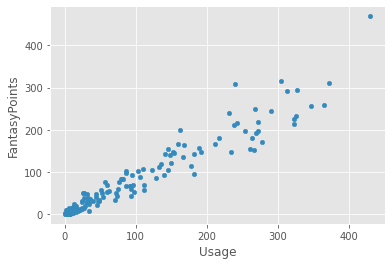

In [9]:
import pandas as pd #import pandas in to our code so we can use it

from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

csv_path = '2019.csv' #our file path is just our file name

df = pd.read_csv(csv_path) #load our CSV in to a DataFrame using read_csv

df.head() # view the first 5 rows of our DataFrame

print(df.shape) # shape is an attribute that tells us the shape of our DataFrame in the format (rows, columns)
print('We have', df.shape[0], 'players we can analyze for the 2019 season')
print('We have', df.shape[1], 'columns of data we can analyze for the 2019 season')

#This is what you should see as your output:
# (620, 28)
# We have 620 players we can analyze for the 2019 season
# We have 28 columns of data we can analyze for the 2019 season

df.__class__


df = df.loc[df['Pos'] == 'RB', ['Player', 'Tgt', 'RushingAtt', 'FantasyPoints']]
df['Usage'] = df['Tgt'] + df['RushingAtt']

df.head()

df['UsageRank'] = df['Usage'].rank(ascending=False)

df['FantasyPointsRank'] = df['FantasyPoints'].rank(ascending=False)

df.sort_values(by='UsageRank').head(15)

plt.style.use('ggplot')

df.plot(x='Usage', y='FantasyPoints', kind='scatter')

def covariance(x, y):
    n = len(x)
    return sum((x - np.mean(x)) * (y - np.mean(y))) * 1/(n-1)

x = df['Usage'].values
y = df['FantasyPoints'].values
x

covariance(x, y)


def corr(x, y):
    return covariance(x, y)/(np.std(x) * np.std(y))

corr(x, y)

X = df['Usage'].values
Y = df['FantasyPoints'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train[:20]
y_train[:20]